In [65]:
import pandas as pd
import json 
from pandas.io.json import json_normalize 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
shap.initjs()
%matplotlib inline 

In [71]:
def f_inspect_df(df):
    # fubction for quickly generating a view about a dataframe, columns, shape, missing values, zeros
    
    print(df.shape)
    print(df.head())
    tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(df.apply(lambda x: x[x==0].count(), axis=0).T).T.rename(index={0:'zeros (num)'}))
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (num)'}))
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

# Data Discovery

### Context Data

In [81]:
# loading surroundings data
with open('data/Surroundings.json') as f:
    d = json.load(f)
    
df_google_maps_data = pd.DataFrame(d)
f_inspect_df(df_google_maps_data)

(546, 2)
   store_code                                       surroundings
0       10055  {'subway_station': [], 'department_store': [],...
1       10077  {'subway_station': [], 'department_store': [],...
2       10079  {'subway_station': [], 'department_store': [{'...
3       10086  {'subway_station': [], 'department_store': [],...
4       10111  {'subway_station': [], 'department_store': [],...


,store_code,surroundings
column type,int64,object
zeros (num),0,0
null values (num),0,0
null values (%),0,0


In [5]:
# dropping some duplicate stores
df_google_maps_data.drop_duplicates('store_code', inplace = True)

In [6]:
# expanding the surroundings column
df_surroundings = json_normalize(df_google_maps_data.surroundings, meta = ['store_code'])
df_surroundings['store_code'] = df_google_maps_data['store_code']
df_surroundings

,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,beauty_salon,...,subway_station,synagogue,taxi_stand,train_station,transit_station,travel_agency,university,veterinary_care,zoo,store_code
0,[{'name': 'Fiduciaire Exacte & Gestion Comptab...,[],[],[],"[{'website': 'http://www.onegeeinfog.com/', 'n...","[{'website': 'https://www.ubs.com/ch/fr.html',...","[{'name': 'Mconseils SA', 'place_id': 'ChIJRz1...","[{'website': 'http://www.ubs.ch/', 'rating': 5...","[{'rating': 3.5, 'place_id': 'ChIJ8xHdm_1vjEcR...","[{'website': 'http://www.jadebeaute.com/', 'ra...",...,[],[],[],[],"[{'name': 'Chêne-Bourg, La Mousse', 'place_id'...","[{'name': 'Courir au Népal Sàrl', 'place_id': ...",[],[{'website': 'http://www.vet-chene-bougeries.c...,[],10055.0
1,[],[],[],[],[],[],"[{'rating': 4.8, 'place_id': 'ChIJM8FbQe9vjEcR...",[],[],[],...,[],[],[],[],"[{'name': 'Chêne-Bougeries, Montagne', 'place_...",[],[],[],[],10077.0
2,[{'website': 'http://www.vd.ch/autorites/depar...,[],[],[],[],"[{'name': 'PickPost-Stelle', 'opening_hours': ...",[{'website': 'https://filialen.migros.ch/de/ta...,"[{'website': 'https://www.ubs.com/ch/fr.html',...",[{'website': 'https://www.facebook.com/Highlan...,"[{'rating': 5, 'place_id': 'ChIJmxg6U4LPjUcR86...",...,[],[],[],[],"[{'name': 'Yverdon-les-Bains, Bel-Air', 'place...","[{'website': 'http://www.hotelplan.ch/FR/', 'r...",[],[],[],10079.0
3,[],[],[],[],[],[],[],[],"[{'website': 'http://www.oubangui.com/', 'rati...",[{'website': 'http://www.blattnerpodologue.ch/...,...,[],[],[],[],"[{'name': 'Bois-Gentil', 'place_id': 'ChIJK8fw...",[],[],[],[],10086.0
4,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],"[{'name': 'Yverdon-les-Bains, Plaisance', 'pla...",[],[],[],[],10111.0
5,"[{'website': 'http://www.cgiconseils.ch/', 'ra...",[],[],[],"[{'rating': 5, 'place_id': 'ChIJkwgDhClljEcRv5...","[{'website': 'https://www.ubs.com/ch/fr.html',...","[{'website': 'http://www.capocaccia.com/', 'ra...","[{'website': 'https://www.credit-suisse.com/',...","[{'website': 'http://www.brasserie-lipp.com/',...","[{'website': 'http://www.forever-beauty.com/',...",...,[],[],[],[],"[{'name': 'Molard', 'place_id': 'ChIJtXxNty5lj...","[{'website': 'http://www.esl.ch/', 'rating': 4...","[{'website': 'http://www.geneva.uibs.org/', 'n...",[],[],10377.0
6,"[{'website': 'https://www.jffiduciaire.ch/', '...",[],[],[],"[{'name': 'Galerie Patrick Roy', 'place_id': '...","[{'website': 'http://bcv.ch/', 'rating': 5, 'p...","[{'website': 'http://www.pouly.ch/', 'rating':...","[{'website': 'http://www.millenniumbcp.pt/', '...","[{'website': 'http://www.kingsizepub.ch/', 'ra...","[{'website': 'http://www.reponse-beaute.ch/', ...",...,[],[],[],"[{'rating': 5, 'place_id': 'ChIJfyenvi4ujEcRUP...","[{'rating': 5, 'place_id': 'ChIJfyenvi4ujEcRUP...","[{'website': 'http://www.hotelplan.ch/FR/', 'r...","[{'website': 'http://www.athenaschool.com/', '...",[],[],10441.0
7,"[{'website': 'http://www.fiva.ch/', 'name': 'F...",[],[],[],[],[{'website': 'https://places.post.ch/poi/-/-/-...,"[{'website': 'http://www.chezzen.ch/', 'rating...","[{'website': 'http://www.migrosbank.ch/', 'nam...","[{'name': 'Orient Express Bar', 'place_id': 'C...","[{'website': 'http://www.l-ideal.ch/', 'name':...",...,[],[],[],"[{'website': 'http://www.cff.ch/gare-de-sion',...","[{'website': 'http://www.cff.ch/gare-de-sion',...","[{'website': 'http://www.lathion-voyages.ch/',...",[],[],[],10545.0
8,"[{'website': 'http://www.fiva.ch/', 'name': 'F...",[],[],[],[],[{'website': 'https://places.post.ch/poi/-/-/-...,"[{'website': 'http://www.chezzen.ch/', 'rating...","[{'website': 'http://www.migrosbank.ch/', 'nam...","[{'name': 'Orient Express Bar', 'place_id': 'C...","[{'website': 'http://www.l-ideal.ch/', 'name':...",...,[],[],[],[],"[{'rating': 3, 'place_id': 'ChIJj8HyODvcjkcRz8...","[{'name': 'Novomar Sion Sàrl', 'place_id': 'Ch...",[],[],[],10548.0
9,[],[],[],[],[],[{'website': 'https://places.post.ch/poi/-/-/-...,[{'website': 'https://filialen.migros.ch/de/mi...,[{'webs

In [68]:
# expanding one of the surrounding type of places to showcase the individuals information available
df_bar = json_normalize(df_google_maps_data['surroundings'], 
                                 record_path= ['bar'])
df_bar

,address_components,formatted_address,icon,international_phone_number,latitude,longitude,name,opening_hours,place_id,price_level,rating,reviews,types,user_ratings_total,website
0,"[{'long_name': '1', 'types': ['street_number']...","Rue de Genève 1, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 348 21 20,46.195884,6.192010,Restaurant Grand-Chêne,"{'weekday_text': ['Monday: 7:30 AM – 1:00 AM',...",ChIJ8xHdm_1vjEcRWSjtRZtcVro,NaN,3.5,"[{'rating': 5, 'author_name': 'Paul Gabbott', ...","[restaurant, bar, food, point_of_interest, est...",28.0,NaN
1,"[{'long_name': '5', 'types': ['street_number']...","Rue des Casernes 5, 1400 Yverdon-les-Bains, Sw...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 79 902 88 90,46.779831,6.637636,Highland's Pub,{'weekday_text': ['Monday: 4:00 PM – 12:00 AM'...,ChIJ_ZZdaoPPjUcRQW2mo3s04p8,NaN,4.6,"[{'rating': 5, 'author_name': 'Daniel González...","[bar, point_of_interest, establishment]",16.0,https://www.facebook.com/Highlands-Pub-Yverdon...
2,"[{'long_name': '1', 'types': ['street_number']...","Place Bel-Air 1, 1400 Yverdon-les-Bains, Switz...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 24 425 59 60,46.780428,6.637378,Y-BAR,{'weekday_text': ['Monday: 7:00 AM – 10:30 PM'...,ChIJx6WJDYPPjUcRBhzxOxdLMbg,NaN,3.5,"[{'rating': 2, 'author_name': 'Per-Anders Frid...","[bar, night_club, point_of_interest, establish...",14.0,NaN
3,"[{'long_name': '45', 'types': ['street_number'...","Rue du Lac 45, 1400 Yverdon-les-Bains, Switzer...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 24 426 08 49,46.779949,6.638389,Caprice,"{'weekday_text': ['Monday: 7:30 AM – 7:00 PM',...",ChIJc8iNZoPPjUcR9azvr9R-dOg,NaN,4.2,"[{'rating': 5, 'author_name': 'Styv M', 'langu...","[restaurant, bar, food, point_of_interest, est...",7.0,http://www.caprice-restaurant.ch/
4,"[{'long_name': '38', 'types': ['street_number'...","Rue d'Orbe 38, 1400 Yverdon-les-Bains, Switzer...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 24 426 56 10,46.779962,6.633618,Bar L'aurore,{'weekday_text': ['Monday: 6:30 AM – 10:00 PM'...,ChIJV2o6ooLPjUcR2Tt96FSGHJY,NaN,4.7,"[{'rating': 5, 'author_name': 'Ferreira Philip...","[bar, food, point_of_interest, establishment]",3.0,NaN
5,"[{'long_name': '74', 'types': ['street_number'...","Route des Plaines-du-Loup 74, 1018 Lausanne, S...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 21 646 58 03,46.540611,6.620909,bar a café l'Oubangui,"{'weekday_text': ['Monday: 6:00 AM – 7:00 PM',...",ChIJizR2seExjEcRV8AG11eL3BA,NaN,3.8,"[{'rating': 5, 'author_name': 'Tony Maillard',...","[restaurant, cafe, bar, food, point_of_interes...",10.0,http://www.oubangui.com/
6,"[{'long_name': 'Confédération centre', 'types'...","Confédération centre, Rue de la Confédération ...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 318 80 30,46.203286,6.144924,Brasserie Lipp Genève,"{'weekday_text': ['Monday: 7:00 AM – 2:00 AM',...",ChIJpSAtailljEcRV-WskLeIpv4,2.0,4.2,"[{'rating': 5, 'author_name': 'patrice de Valo...","[bar, restaurant, food, point_of_interest, est...",175.0,http://www.brasserie-lipp.com/
7,"[{'long_name': '7', 'types': ['street_number']...","Rue du Rhône 7, 1204 Genève, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 810 32 60,46.204600,6.144372,Arthur's rivegauche,NaN,ChIJkcHaAClljEcRnswQD7fC1R8,NaN,3.9,"[{'rating': 1, 'author_name': 'KM', 'language'...","[restaurant, bar, night_club, food, point_of_i...",71.0,http://www.arthurs.ch/restaurants/arthurs-rive...
8,"[{'long_name': '2', 'types': ['street_number']...","Rue de la Rôtisserie 2, 1204 Genève, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 311 41 10,46.202965,6.145521,La Romantica,"{'weekday_text': ['Monday: 10:30 AM – 3:30 PM,...",ChIJU4_zRClljEcRjRPSDdO0Xho,NaN,3.7,"[{'rating': 4, 'author_name': 'Thomas O', 'lan...","[meal_takeaway, bar, restaurant, food, point_o...",55.0,http://www.laromantica-geneve.ch/
9,"[{'long_name': '10', 't

In [73]:
f_inspect_df(df_bar)

(1785, 15)
                                  address_components  \
0  [{'long_name': '1', 'types': ['street_number']...   
1  [{'long_name': '5', 'types': ['street_number']...   
2  [{'long_name': '1', 'types': ['street_number']...   
3  [{'long_name': '45', 'types': ['street_number'...   
4  [{'long_name': '38', 'types': ['street_number'...   

                                   formatted_address  \
0     Rue de Genève 1, 1225 Chêne-Bourg, Switzerland   
1  Rue des Casernes 5, 1400 Yverdon-les-Bains, Sw...   
2  Place Bel-Air 1, 1400 Yverdon-les-Bains, Switz...   
3  Rue du Lac 45, 1400 Yverdon-les-Bains, Switzer...   
4  Rue d'Orbe 38, 1400 Yverdon-les-Bains, Switzer...   

                                                icon  \
0  https://maps.gstatic.com/mapfiles/place_api/ic...   
1  https://maps.gstatic.com/mapfiles/place_api/ic...   
2  https://maps.gstatic.com/mapfiles/place_api/ic...   
3  https://maps.gstatic.com/mapfiles/place_api/ic...   
4  https://maps.gstatic.com/mapfile

,address_components,formatted_address,icon,international_phone_number,latitude,longitude,name,opening_hours,place_id,price_level,rating,reviews,types,user_ratings_total,website
column type,object,object,object,object,float64,float64,object,object,object,float64,float64,object,object,float64,object
zeros (num),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (num),0,0,0,204,0,0,0,371,0,1777,203,203,0,203,379
null values (%),0,0,0,11.4286,0,0,0,20.7843,0,99.5518,11.3725,11.3725,0,11.3725,21.2325


In [76]:
df_bar.loc[:,'reviews']

0       [{'rating': 5, 'author_name': 'Paul Gabbott', ...
1       [{'rating': 5, 'author_name': 'Daniel González...
2       [{'rating': 2, 'author_name': 'Per-Anders Frid...
3       [{'rating': 5, 'author_name': 'Styv M', 'langu...
4       [{'rating': 5, 'author_name': 'Ferreira Philip...
5       [{'rating': 5, 'author_name': 'Tony Maillard',...
6       [{'rating': 5, 'author_name': 'patrice de Valo...
7       [{'rating': 1, 'author_name': 'KM', 'language'...
8       [{'rating': 4, 'author_name': 'Thomas O', 'lan...
9       [{'rating': 3, 'author_name': 'Jean-Baptiste L...
10      [{'rating': 5, 'author_name': 'Nicholas Panari...
11      [{'rating': 5, 'author_name': 'Raymond Wehbe',...
12      [{'rating': 4, 'author_name': 'Albert James', ...
13      [{'rating': 2, 'author_name': 'Robin Skibo-Bir...
14      [{'rating': 1, 'author_name': 'S Aa', 'languag...
15      [{'rating': 4, 'author_name': 'Erez R. Mizrach...
16      [{'rating': 5, 'author_name': 'Sergius Dergach...
17      [{'rat

In [77]:
df_bar.loc[:,'user_ratings_total'].unique()

array([2.800e+01, 1.600e+01, 1.400e+01, 7.000e+00, 3.000e+00, 1.000e+01,
       1.750e+02, 7.100e+01, 5.500e+01, 2.900e+01, 3.500e+01, 1.200e+01,
       1.900e+01, 2.000e+00, 2.230e+02, 1.610e+02, 2.500e+01, 1.390e+02,
       4.000e+00, 9.000e+00, 1.180e+02, 1.700e+01,       nan, 7.700e+01,
       2.560e+02, 7.000e+01, 3.900e+01, 4.700e+01, 1.000e+00, 7.800e+01,
       1.740e+02, 7.900e+01, 3.800e+01, 2.700e+01, 7.200e+01, 3.000e+01,
       8.000e+00, 6.000e+00, 7.300e+01, 4.400e+01, 1.800e+01, 9.600e+01,
       1.210e+02, 2.440e+02, 2.200e+01, 2.000e+01, 3.300e+01, 3.400e+01,
       8.600e+01, 5.000e+00, 1.650e+02, 2.360e+02, 9.200e+01, 2.100e+01,
       1.170e+02, 4.220e+02, 6.300e+01, 1.060e+02, 8.900e+01, 1.300e+01,
       4.100e+01, 1.500e+01, 4.800e+01, 5.300e+01, 6.500e+01, 1.900e+02,
       2.300e+01, 3.700e+01, 6.800e+01, 3.200e+01, 4.000e+01, 1.100e+01,
       1.270e+02, 2.400e+01, 8.500e+01, 6.900e+01, 5.100e+01, 2.600e+01,
       4.600e+01, 5.000e+01, 5.700e+01, 8.100e+01, 

#### Summary

This dataset seems/is a response from the google maps api providing information about places near specific stores
- On high level it contains information about different types of places near a store (bars, stations etc.)
- Additionally, for each place near a store, it contains more specific information such as address, opening hours, ratings & reviews
- There is a fare amount of missing columns in this dataset
- The high level information(type of place) along with reviews, ratings, opening hours & post code data have potentially predictive power over store sales
- There is not temporal dimension in this data

### Sales Data

In [13]:
# loadingg sales data and transforming it to datetime index
df_sales_data = pd.read_csv('data/sales_granular.csv')
df_sales_data.set_index('store_code', inplace = True)
df_sales_data.drop_duplicates(inplace = True)
df_sales_data = df_sales_data.T
df_sales_data.index = df_sales_data.index.map(lambda x: pd.to_datetime(x))

In [14]:
# the dataset spans two years
d_first_date = pd.to_datetime(df_sales_data.index[0])
d_last_date = pd.to_datetime(df_sales_data.index[-1])

In [15]:
f_inspect_df(df_sales_data)

(11936, 903)
store_code           10055  10077  10079  10081  10085  10086  10111  10176  \
2015-08-03 09:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 10:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 11:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 12:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 13:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

store_code           10377  10384  ...    84089  84125  84128  84146  84219  \
2015-08-03 09:00:00    NaN    NaN  ...      NaN    NaN    NaN  300.0    NaN   
2015-08-03 10:00:00    NaN    NaN  ...      NaN    NaN    NaN  600.0    NaN   
2015-08-03 11:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 12:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 13:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   

store_code           84223  84351  84

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
zeros (num),0,0,1,4,0,0,0,0,2,3,...,1,2,1,2,0,0,0,3,0,1
null values (num),11650,11901,10996,10053,11513,11561,11723,10940,11517,10682,...,11875,11609,11154,5444,11737,11841,11890,10434,11847,11720
null values (%),97.6039,99.7068,92.1247,84.2242,96.4561,96.8582,98.2155,91.6555,96.4896,89.494,...,99.4889,97.2604,93.4484,45.6099,98.3328,99.2041,99.6146,87.4162,99.2544,98.1903


In [16]:
# filtering out stores that are note present in the googgle maps dataset
l_common_stores = [store for store in df_google_maps_data.store_code if store in df_sales_data.columns]
df_sales_data_filtered = df_sales_data[l_common_stores]
f_inspect_df(df_sales_data_filtered)

(11936, 539)
store_code           10055  10077  10079  10086  10111  10377  10441  10545  \
2015-08-03 09:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 10:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 11:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 12:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-08-03 13:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

store_code           10548  10672  ...    4565   45940  46147  46279  46361  \
2015-08-03 09:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 10:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 11:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 12:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   
2015-08-03 13:00:00    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN   

store_code           46379  46468  46

store_code,10055,10077,10079,10086,10111,10377,10441,10545,10548,10672,...,4565,45940,46147,46279,46361,46379,46468,46587,46610,47724
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
zeros (num),0,0,1,0,0,2,0,0,1,0,...,1,0,0,0,0,2,0,0,0,0
null values (num),11650,11901,10996,11561,11723,11517,10780,11778,11543,11755,...,11800,11929,11902,11734,11929,11698,11854,11906,11934,11805
null values (%),97.6039,99.7068,92.1247,96.8582,98.2155,96.4896,90.315,98.6763,96.7074,98.4836,...,98.8606,99.9414,99.7151,98.3076,99.9414,98.006,99.313,99.7487,99.9832,98.9025


#### Summary
This a typical sales dataset at store level. 
- It spans a period of almost 2 years and the frequency is by-hourly
- It contains a very large number of missing values, to a large extend due to high frequency
- The sales data file contains information for more stores than the google maps data.

# Features

In [17]:
# aggregating sales data to weekly level
df_sales_data_resampled = df_sales_data_filtered.resample('W',closed='left',label='left').sum()
df_sales_data_resampled.head()

store_code,10055,10077,10079,10086,10111,10377,10441,10545,10548,10672,...,4565,45940,46147,46279,46361,46379,46468,46587,46610,47724
2015-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


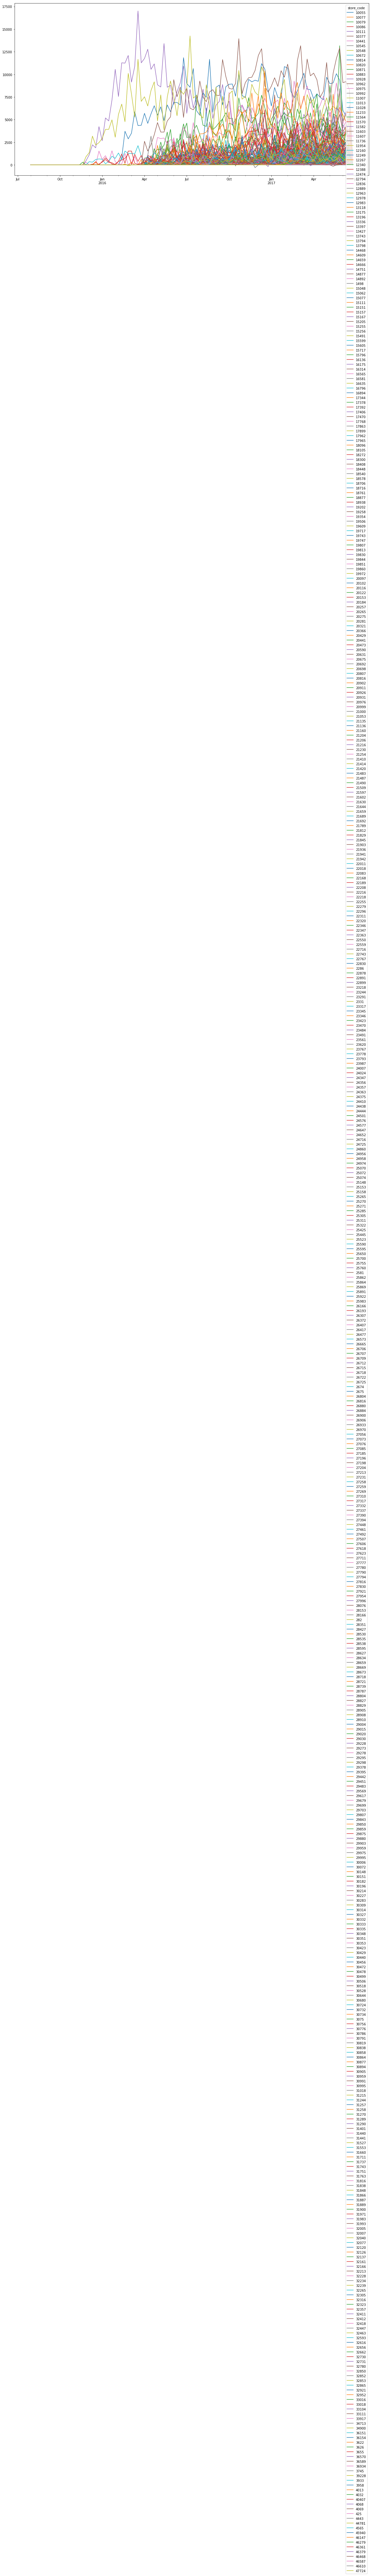

In [18]:
# taking a look at the weekly time series
df_sales_data_resampled.plot(figsize = (20,10))

It seems that there are a few stores with high sales and many small ones. The impact of the stores with high sales seems to reduce asd more stores open

In [19]:
f_inspect_df(df_sales_data_resampled)

(100, 539)
store_code  10055  10077  10079  10086  10111  10377  10441  10545  10548  \
2015-08-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-09    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-16    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-23    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-30    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

store_code  10672  ...    4565   45940  46147  46279  46361  46379  46468  \
2015-08-02    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-09    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-16    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-23    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-08-30    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

store_code  46587  46610  47724  
2015-08-02    0.0    0.0    0

store_code,10055,10077,10079,10086,10111,10377,10441,10545,10548,10672,...,4565,45940,46147,46279,46361,46379,46468,46587,46610,47724
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
zeros (num),40,84,36,77,78,55,38,68,42,70,...,69,95,81,77,93,75,75,80,98,79
null values (num),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We identify the first sale of a store and then we treat this as the opening a week for the store

In [20]:
# identifying the week on which a store made its first sale
df_first_sale_per_store = df_sales_data_resampled.ne(0).idxmax().to_frame()
df_first_sale_per_store

,0
store_code,
10055,2016-04-24
10077,2016-11-20
10079,2016-04-03
10086,2017-01-22
10111,2017-01-22
10377,2016-04-03
10441,2016-04-17
10545,2016-11-13
10548,2016-02-21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6eb7b1d0>]],
      dtype=object)

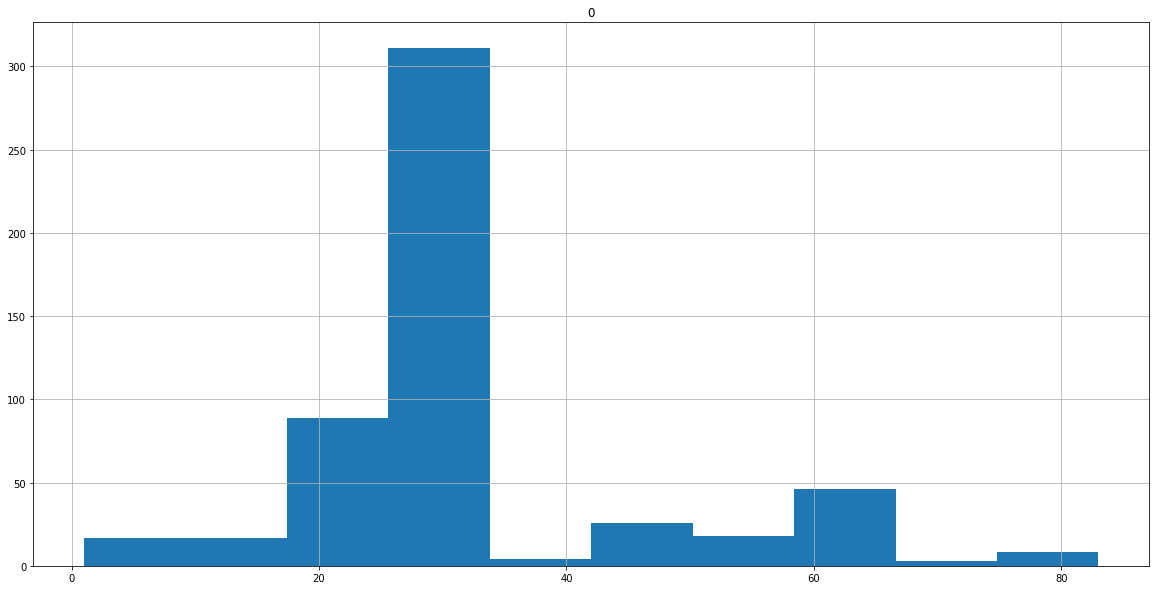

In [21]:
# distribution of the number of history, in weeks, we have for each store 
((d_last_date - df_sales_data_resampled.ne(0).idxmax()).dt.days/7.0).to_frame().hist(figsize = (20, 10))

The plot above shows that for the majority of the stores we have up to 35 weeks of history

In [80]:
# generating a dataframe that distinguishes between active and inactive weeks for each store
df_sales_store = pd.DataFrame({store:df_sales_data_resampled[df_sales_data_resampled.index >= df_sales_data_resampled.ne(0).idxmax()[store]][store] for store in df_first_sale_per_store.index})
f_inspect_df(df_sales_store)

(84, 539)
            10055  10077  10079  10086  10111  10377  10441  10545  10548  \
2015-11-22    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-11-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-13    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-20    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            10672  ...    4565   45940  46147  46279  46361  46379  46468  \
2015-11-22    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-11-29    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-06    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-13    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-12-20    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            46587  46610  47724  
2015-11-22    NaN    NaN    Na

,10055,10077,10079,10086,10111,10377,10441,10545,10548,10672,...,4565,45940,46147,46279,46361,46379,46468,46587,46610,47724
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
zeros (num),2,16,1,0,1,20,1,1,13,0,...,1,9,12,0,23,1,9,13,7,0
null values (num),22,52,19,61,61,19,21,51,13,54,...,52,70,53,61,54,58,50,51,75,63
null values (%),26.1905,61.9048,22.619,72.619,72.619,22.619,25,60.7143,15.4762,64.2857,...,61.9048,83.3333,63.0952,72.619,64.2857,69.0476,59.5238,60.7143,89.2857,75


# Feature Understanding

In [25]:
# stacking the individuals
df_stacked = df_sales_store.stack().to_frame()
df_stacked.reset_index(inplace = True)

In [26]:
# some pre-processing
df_stacked.rename(columns = {'level_0': 'Date', 'level_1': 'store_code', 0:'sales'}, inplace = True)
df_stacked.drop('Date', axis = 1, inplace = True)
df_stacked.set_index('store_code', inplace = True)

In [28]:
# transforming the features from list-dict to the number many places of each type per store code
df_store_features = df_surroundings.copy()
df_store_features[df_store_features.columns[:-1]] = df_store_features[df_store_features.columns[:-1]].applymap(lambda x: len(x))
df_store_features.set_index('store_code', inplace = True)
f_inspect_df(df_store_features)

(545, 89)
            accounting  airport  amusement_park  aquarium  art_gallery  atm  \
store_code                                                                    
10055.0              3        0               0         0            1    1   
10077.0              0        0               0         0            0    0   
10079.0              1        0               0         0            0    3   
10086.0              0        0               0         0            0    0   
10111.0              0        0               0         0            0    0   

            bakery  bank  bar  beauty_salon ...   store  subway_station  \
store_code                                  ...                           
10055.0          3     3    1             4 ...      31               0   
10077.0          1     0    0             0 ...       6               0   
10079.0          3     1    4             4 ...      53               0   
10086.0          0     0    1             2 ...       3      

,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,beauty_salon,...,store,subway_station,synagogue,taxi_stand,train_station,transit_station,travel_agency,university,veterinary_care,zoo
column type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
zeros (num),357,541,542,544,406,141,193,167,250,158,...,13,539,540,516,300,22,198,478,454,542
null values (num),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# connecting the stacked times series data with the store information for each observation
df_dataset = df_stacked.merge(df_store_features, how = 'left', left_index = True, right_index = True)
df_dataset.dropna(inplace = True)
df_dataset.head()

,sales,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,...,store,subway_station,synagogue,taxi_stand,train_station,transit_station,travel_agency,university,veterinary_care,zoo
store_code,,,,,,,,,,,,,,,,,,,,,
282,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [31]:
f_inspect_df(df_dataset)

(18225, 90)
            sales  accounting  airport  amusement_park  aquarium  art_gallery  \
store_code                                                                      
282          30.0         0.0      0.0             0.0       0.0          0.0   
282           0.0         0.0      0.0             0.0       0.0          0.0   
282           0.0         0.0      0.0             0.0       0.0          0.0   
282           0.0         0.0      0.0             0.0       0.0          0.0   
282           0.0         0.0      0.0             0.0       0.0          0.0   

            atm  bakery  bank  bar ...   store  subway_station  synagogue  \
store_code                         ...                                      
282         0.0     0.0   0.0  0.0 ...     4.0             0.0        0.0   
282         0.0     0.0   0.0  0.0 ...     4.0             0.0        0.0   
282         0.0     0.0   0.0  0.0 ...     4.0             0.0        0.0   
282         0.0     0.0   0.0  0.0 

,sales,accounting,airport,amusement_park,aquarium,art_gallery,atm,bakery,bank,bar,...,store,subway_station,synagogue,taxi_stand,train_station,transit_station,travel_agency,university,veterinary_care,zoo
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
zeros (num),4465,11892,18109,18029,18213,13373,4486,6079,5332,8302,...,414,17940,17991,17343,10141,743,6355,15584,14965,18095
null values (num),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# splitting training/test sets
df_X = df_dataset[df_dataset.columns[1:]]
df_y = df_dataset[df_dataset.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=58)

In [60]:
# initializing xgboost model as regressor
regr= xgb.XGBRegressor(max_depth = 3, random_state = 5, learning_rate = 0.1)

In [63]:
# training regressor model
regr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
regr.score(X_test, y_test)

[0]	validation_0-rmse:1311.19	validation_1-rmse:1380.8
[1]	validation_0-rmse:1260.62	validation_1-rmse:1333.02
[2]	validation_0-rmse:1217.81	validation_1-rmse:1291.33
[3]	validation_0-rmse:1181.3	validation_1-rmse:1256.88
[4]	validation_0-rmse:1150.5	validation_1-rmse:1227.85
[5]	validation_0-rmse:1124.56	validation_1-rmse:1203.16
[6]	validation_0-rmse:1102.57	validation_1-rmse:1182.49
[7]	validation_0-rmse:1085.97	validation_1-rmse:1166.23
[8]	validation_0-rmse:1065.48	validation_1-rmse:1145.25
[9]	validation_0-rmse:1054.51	validation_1-rmse:1135.01
[10]	validation_0-rmse:1045.42	validation_1-rmse:1126.35
[11]	validation_0-rmse:1030.41	validation_1-rmse:1111.55
[12]	validation_0-rmse:1019.46	validation_1-rmse:1099.6
[13]	validation_0-rmse:1011.22	validation_1-rmse:1091.69
[14]	validation_0-rmse:1000.09	validation_1-rmse:1082.3
[15]	validation_0-rmse:977.588	validation_1-rmse:1056.78
[16]	validation_0-rmse:971.026	validation_1-rmse:1050.73
[17]	validation_0-rmse:958.305	validation_1-rm

0.6531993435431265

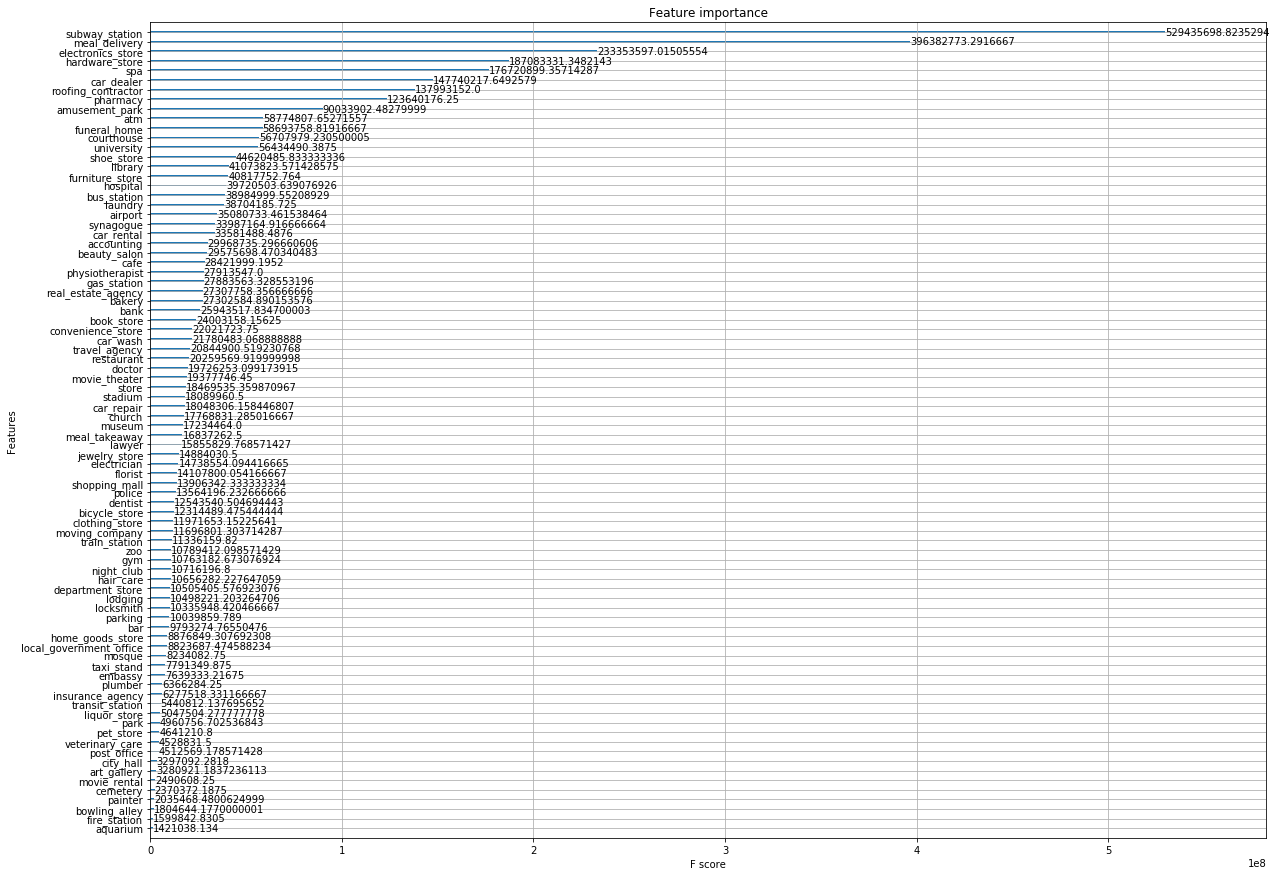

In [56]:
# features importance plot
ax = xgb.plot_importance(regr, importance_type='gain')
fig = ax.figure
fig.set_size_inches(20, 15)

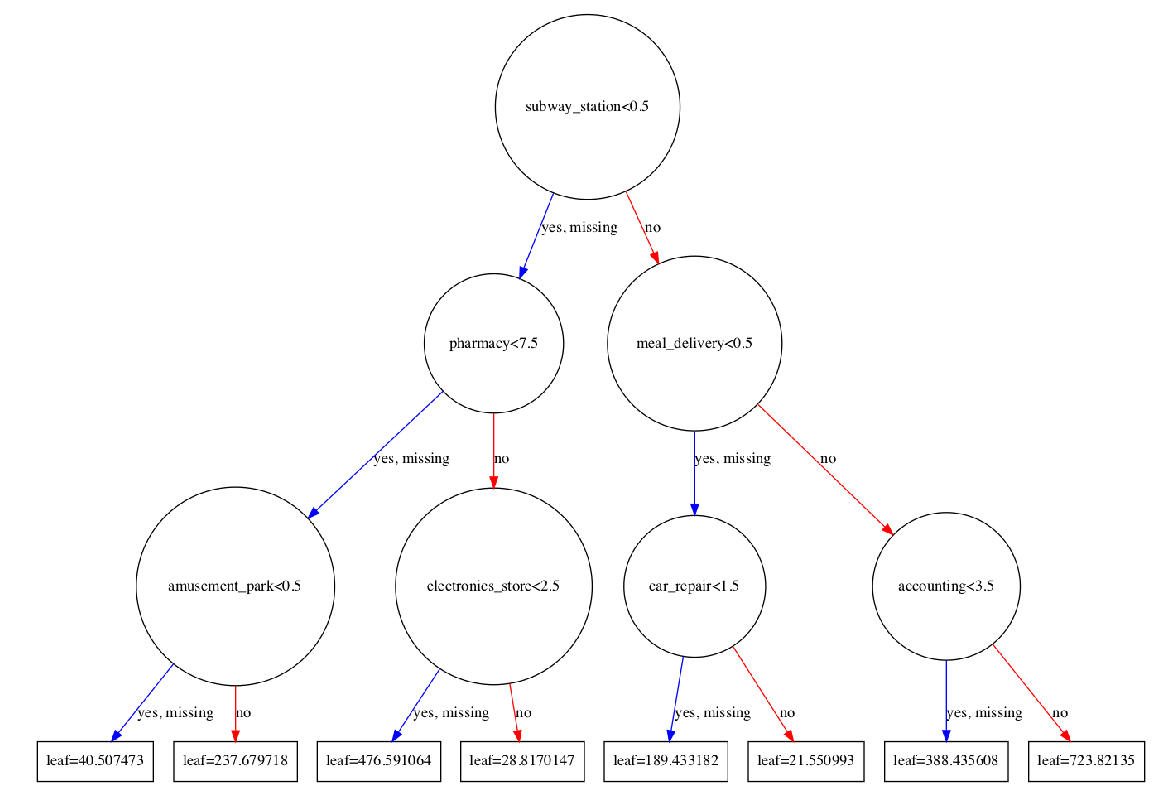

In [64]:
# illustrative tree explanation
ax = xgb.plot_tree(regr, num_trees=1)
fig = ax.figure
fig.set_size_inches(20, 15)

In [49]:
# initializing shap
explainer = shap.TreeExplainer(regr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)]))
shap_values = explainer.shap_values(X_train)

[0]	validation_0-rmse:1311.19	validation_1-rmse:1380.8
[1]	validation_0-rmse:1260.62	validation_1-rmse:1333.02
[2]	validation_0-rmse:1217.81	validation_1-rmse:1291.33
[3]	validation_0-rmse:1181.3	validation_1-rmse:1256.88
[4]	validation_0-rmse:1150.5	validation_1-rmse:1227.85
[5]	validation_0-rmse:1124.56	validation_1-rmse:1203.16
[6]	validation_0-rmse:1102.57	validation_1-rmse:1182.49
[7]	validation_0-rmse:1085.97	validation_1-rmse:1166.23
[8]	validation_0-rmse:1065.48	validation_1-rmse:1145.25
[9]	validation_0-rmse:1054.51	validation_1-rmse:1135.01
[10]	validation_0-rmse:1045.42	validation_1-rmse:1126.35
[11]	validation_0-rmse:1030.41	validation_1-rmse:1111.55
[12]	validation_0-rmse:1019.46	validation_1-rmse:1099.6
[13]	validation_0-rmse:1011.22	validation_1-rmse:1091.69
[14]	validation_0-rmse:1000.09	validation_1-rmse:1082.3
[15]	validation_0-rmse:977.588	validation_1-rmse:1056.78
[16]	validation_0-rmse:971.026	validation_1-rmse:1050.73
[17]	validation_0-rmse:958.305	validation_1-rm

In [51]:
# visualizing the dynamics of a singgle prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[5,:])

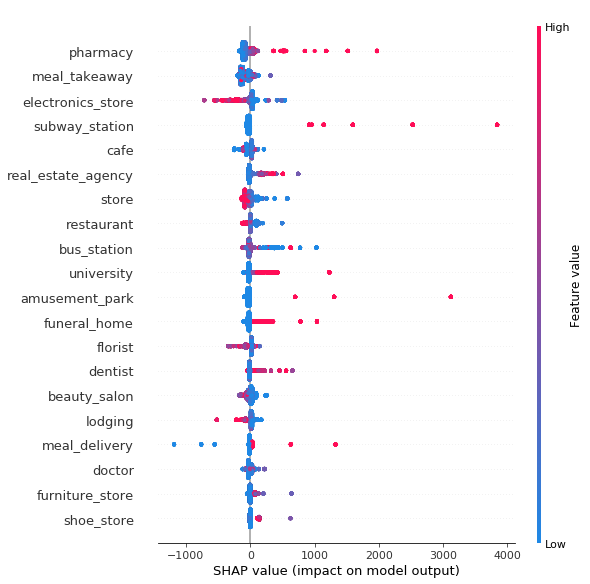

In [83]:
# summarize the effects for all features
shap.summary_plot(shap_values, X_train)